In [23]:
import pandas as pd
import re
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import sidetable 

In [24]:
pd.options.display.max_columns = None

In [25]:
df = pd.read_csv("../data/6.dataframe_analisis.csv", index_col = 0)

# Se hace esto para resetear los índices
df.reset_index(drop=True , inplace=True)
df.head(2)

,q1_edad,q2_genero,q3_país,q4_educacion,q5_ocupacion,q6_exp_tech,q8_l_recomendado,q11_tipo_plataforma,q20_i_actual,q21_tamanio_cia,q22_da_cia,q25_salario,q26_ppto_ml_cc,q33_bigdata_product,q35_h_i_negocios,q41_h_process_data,q7_l_utilizados,q9_adi,q14_h_viz,q10_part_1,q10_part_2,q10_part_3,q10_part_4,q10_part_5,q10_part_6,q10_part_7,q10_part_8,q10_part_9,q10_part_10,q10_part_11,q10_part_12,q10_part_13,q10_part_14,q10_part_15,q10_part_16,q10_other,q18_part_1,q18_part_2,q18_part_3,q18_part_4,q18_part_5,q18_part_6,q18_other,q27_a_part_1,q27_a_part_2,q27_a_part_3,q27_a_part_4,q27_a_part_5,q27_a_part_6,q27_a_part_7,q27_a_part_8,q27_a_part_9,q27_a_part_10,q27_a_part_11,q27_a_other,q39_part_1,q39_part_2,q39_part_3,q39_part_4,q39_part_5,q39_part_6,q39_part_7,q39_part_8,q39_part_9,q39_other,q40_part_1,q40_part_2,q40_part_3,q40_part_4,q40_part_5,q40_part_6,q40_part_7,q40_part_8,q40_part_9,q40_part_10,q40_part_11,q40_other,q42_part_1,q42_part_2,q42_part_3,q42_part_4,q42_part_5,q42_part_6,q42_part_7,q42_part_8,q42_part_9,q42_part_10,q42_part_11,q42_other
0,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,A laptop,Manufacturing/Fabrication,50-249 employees,3-4,"25,000-29,999",$100-$999,NaN,NaN,"Local development environments (RStudio, Jupyt...","Python, R",Vim / Emacs,"Matplotlib ,Seaborn ,Ggplot / ggplot2 ,Shiny ...",NaN,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"General purpose image/video tools (PIL, cv2, s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Google Cloud Platform (GCP),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GitHub,NaN,Kaggle,NaN,NaN,NaN,NaN,Coursera,edX,Kaggle Learn Courses,DataCamp,NaN,Udacity,Udemy,NaN,NaN,NaN,NaN,NaN,NaN,"Email newsletters (Data Elixir, O'Reilly Data ...",NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...","Blogs (Towards Data Science, Analytics Vidhya,...","Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN
1,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Python,"A cloud computing platform (AWS, Azure, GCP, h...",Manufacturing/Fabrication,"1000-9,999 employees",1-2,"60,000-69,999",$0 ($USD),NaN,NaN,"Advanced statistical software (SPSS, SAS, etc.)","SQL, C, C++, Java","Notepad++,Jupyter Notebook",Matplotlib,Kaggle Notebooks,Colab Notebooks,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Kaggle Learn Courses,NaN,NaN,NaN,NaN,NaN,"Cloud-certification programs (direct from AWS,...",University Courses (resulting in a university ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN


In [26]:
df.columns

Index(['q1_edad', 'q2_genero', 'q3_país', 'q4_educacion', 'q5_ocupacion',
       'q6_exp_tech', 'q8_l_recomendado', 'q11_tipo_plataforma',
       'q20_i_actual', 'q21_tamanio_cia', 'q22_da_cia', 'q25_salario',
       'q26_ppto_ml_cc', 'q33_bigdata_product', 'q35_h_i_negocios',
       'q41_h_process_data', 'q7_l_utilizados', 'q9_adi', 'q14_h_viz',
       'q10_part_1', 'q10_part_2', 'q10_part_3', 'q10_part_4', 'q10_part_5',
       'q10_part_6', 'q10_part_7', 'q10_part_8', 'q10_part_9', 'q10_part_10',
       'q10_part_11', 'q10_part_12', 'q10_part_13', 'q10_part_14',
       'q10_part_15', 'q10_part_16', 'q10_other', 'q18_part_1', 'q18_part_2',
       'q18_part_3', 'q18_part_4', 'q18_part_5', 'q18_part_6', 'q18_other',
       'q27_a_part_1', 'q27_a_part_2', 'q27_a_part_3', 'q27_a_part_4',
       'q27_a_part_5', 'q27_a_part_6', 'q27_a_part_7', 'q27_a_part_8',
       'q27_a_part_9', 'q27_a_part_10', 'q27_a_part_11', 'q27_a_other',
       'q39_part_1', 'q39_part_2', 'q39_part_3', 'q39_part_4'

In [27]:
lista_eliminar= ['q8_l_recomendado', 'q11_tipo_plataforma',
       'q20_i_actual', 'q21_tamanio_cia', 'q22_da_cia', 'q25_salario',
       'q26_ppto_ml_cc', 'q33_bigdata_product', 'q35_h_i_negocios',
       'q41_h_process_data', 'q7_l_utilizados', 'q9_adi', 'q14_h_viz',
       'q10_part_1', 'q10_part_2', 'q10_part_3', 'q10_part_4', 'q10_part_5',
       'q10_part_6', 'q10_part_7', 'q10_part_8', 'q10_part_9', 'q10_part_10',
       'q10_part_11', 'q10_part_12', 'q10_part_13', 'q10_part_14',
       'q10_part_15', 'q10_part_16', 'q10_other', 'q18_part_1', 'q18_part_2',
       'q18_part_3', 'q18_part_4', 'q18_part_5', 'q18_part_6', 'q18_other',
       'q27_a_part_1', 'q27_a_part_2', 'q27_a_part_3', 'q27_a_part_4',
       'q27_a_part_5', 'q27_a_part_6', 'q27_a_part_7', 'q27_a_part_8',
       'q27_a_part_9', 'q27_a_part_10', 'q27_a_part_11', 'q27_a_other',
       'q39_part_1', 'q39_part_2', 'q39_part_3', 'q39_part_4', 'q39_part_5',
       'q39_part_6', 'q39_part_7', 'q39_part_8', 'q39_part_9', 'q39_other',
       'q40_part_1', 'q40_part_2', 'q40_part_3', 'q40_part_4', 'q40_part_5',
       'q40_part_6', 'q40_part_7', 'q40_part_8', 'q40_part_9', 'q40_part_10',
       'q40_part_11', 'q40_other', 'q42_part_1', 'q42_part_2', 'q42_part_3',
       'q42_part_4', 'q42_part_5', 'q42_part_6', 'q42_part_7', 'q42_part_8',
       'q42_part_9', 'q42_part_10', 'q42_part_11', 'q42_other']

In [28]:
df_perfil = df.drop(columns = lista_eliminar, axis=1)

In [29]:
df.columns

Index(['q1_edad', 'q2_genero', 'q3_país', 'q4_educacion', 'q5_ocupacion',
       'q6_exp_tech', 'q8_l_recomendado', 'q11_tipo_plataforma',
       'q20_i_actual', 'q21_tamanio_cia', 'q22_da_cia', 'q25_salario',
       'q26_ppto_ml_cc', 'q33_bigdata_product', 'q35_h_i_negocios',
       'q41_h_process_data', 'q7_l_utilizados', 'q9_adi', 'q14_h_viz',
       'q10_part_1', 'q10_part_2', 'q10_part_3', 'q10_part_4', 'q10_part_5',
       'q10_part_6', 'q10_part_7', 'q10_part_8', 'q10_part_9', 'q10_part_10',
       'q10_part_11', 'q10_part_12', 'q10_part_13', 'q10_part_14',
       'q10_part_15', 'q10_part_16', 'q10_other', 'q18_part_1', 'q18_part_2',
       'q18_part_3', 'q18_part_4', 'q18_part_5', 'q18_part_6', 'q18_other',
       'q27_a_part_1', 'q27_a_part_2', 'q27_a_part_3', 'q27_a_part_4',
       'q27_a_part_5', 'q27_a_part_6', 'q27_a_part_7', 'q27_a_part_8',
       'q27_a_part_9', 'q27_a_part_10', 'q27_a_part_11', 'q27_a_other',
       'q39_part_1', 'q39_part_2', 'q39_part_3', 'q39_part_4'

6. Filtrado por ocupación= data analyst. 
- ¿ En qué países hay mayor, cómo es el mercado en España, hay pocos analistas de datos?

In [30]:
df_analista = df_perfil[df_perfil['q5_ocupacion'] == 'Data Analyst']

In [31]:
df_analista_España= df_analista[df_analista['q3_país'] == 'Spain']

In [32]:
df_analista_sinEspaña_sinOther= df_analista[(df_analista['q3_país'] != 'Spain') & (df_analista['q3_país'] != 'Other')]

In [33]:
df_analista_sinOther= df_analista[df_analista['q3_país'] != 'Other']

In [34]:
df_analista.stb.freq(['q3_país'])[:31]

,q3_país,count,percent,cumulative_count,cumulative_percent
0,India,564,24.511082,564,24.511082
1,United States of America,258,11.212516,822,35.723598
2,Other,135,5.867014,957,41.590613
3,Nigeria,102,4.432855,1059,46.023468
4,China,94,4.085180,1153,50.108648
5,Egypt,87,3.780965,1240,53.889613
6,Russia,68,2.955237,1308,56.844850
7,Brazil,64,2.781399,1372,59.626249
8,United Kingdom of Great Britain and Northern I...,53,2.303346,1425,61.929596
9,Japan,46,1.999131,1471,63.928727


In [35]:
df_analista_sinOther.reset_index

<bound method DataFrame.reset_index of       q1_edad  q2_genero                   q3_país  \
16      50-54        Man                   Belgium   
32      22-24  Nonbinary  United States of America   
33      30-34      Woman                     Egypt   
46      22-24        Man                     China   
52      40-44        Man              South Africa   
...       ...        ...                       ...   
25954   25-29        Man                     India   
25959   18-21        Man                     India   
25965   18-21        Man                     India   
25966   30-34        Man                     India   
25968   30-34        Man                     Egypt   

                                            q4_educacion  q5_ocupacion  \
16                                     Bachelor’s degree  Data Analyst   
32     Some college/university study without earning ...  Data Analyst   
33                                     Bachelor’s degree  Data Analyst   
46     Some coll

In [36]:
df_paises = df_analista_sinOther.stb.freq(['q3_país'])[:21]

In [37]:
df_paises2= df_paises.drop(df_paises.index[11:20], axis = 0)

In [38]:
d4 = df_analista_sinOther.stb.freq(['q3_país']) #2166 personas encuestadas
d4['q3_país'].unique() #63 países + 1 'i do not wish to blabla my location'


array(['India', 'United States of America', 'Nigeria', 'China', 'Egypt',
       'Russia', 'Brazil',
       'United Kingdom of Great Britain and Northern Ireland', 'Japan',
       'Indonesia', 'Pakistan', 'Australia', 'Kenya', 'Canada', 'Germany',
       'Taiwan', 'South Korea', 'Mexico', 'France', 'Colombia', 'Spain',
       'Turkey', 'Poland', 'Bangladesh', 'Argentina', 'Ukraine', 'Peru',
       'Viet Nam', 'Singapore', 'Thailand', 'Philippines', 'Italy',
       'Ghana', 'Netherlands', 'Israel', 'Saudi Arabia', 'Malaysia',
       'Greece', 'Hong Kong (S.A.R.)', 'United Arab Emirates',
       'South Africa', 'Portugal', 'Iran, Islamic Republic of...',
       'Chile', 'Sweden', 'Ecuador', 'Morocco', 'Czech Republic',
       'Belgium', 'Sri Lanka', 'Nepal', 'Ireland',
       'I do not wish to disclose my location', 'Belarus', 'Tunisia',
       'Switzerland', 'Kazakhstan', 'Iraq', 'Uganda', 'Romania',
       'Austria', 'Norway', 'Ethiopia', 'Denmark'], dtype=object)

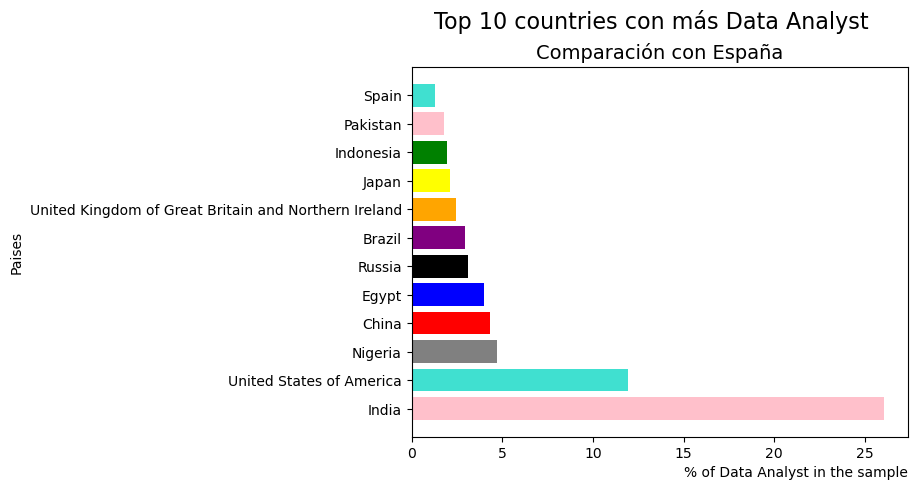

In [45]:
plt.figure()

plt.barh('q3_país', 'percent', data = df_paises2, color = ['pink',"turquoise",'gray','red','blue','black','purple','orange','yellow','green'])
plt.title('Comparación con España',fontsize=14)
plt.suptitle('Top 10 countries con más Data Analyst',fontsize=16, y=1)


#plt.title('Top 10 countries with more Data Anayst')
plt.ylabel('Paises')
plt.xlabel('% of Data Analyst in the sample',loc = 'right' )
plt.show()

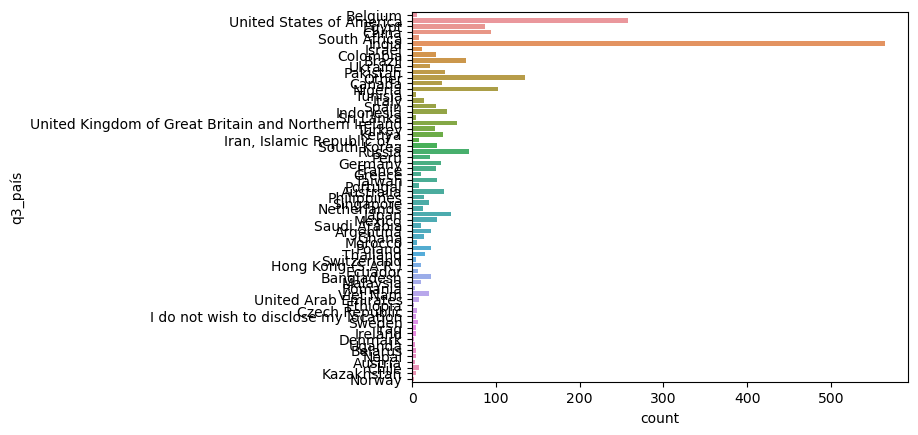

In [40]:
sns.countplot(data=df_analista , y= 'q3_país');

7. Por qué hay tantos en la **india**, por las condiciones de trabajo en **india**, y porque desarrollan tecnología. 
- Los países con más presencia son los países con más desarrollo de la industra TEch.